In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Warning range (9.2m) greater than limit 9.0m
Warning range (9.2m) greater than limit 9.0m
Warning range (9.2m) greater than limit 9.0m
Warning range (9.2m) greater than limit 9.0m
Warning range (9.2m) greater than limit 9.0m


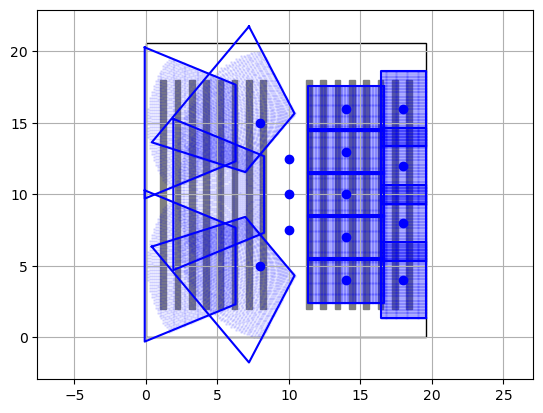

In [166]:
#just for drawing the compartment and plants
compartmentsize = np.array([19.6,20.6]) #size of the whole compartment (metres)
plants = np.array([0.4,16]) #size of plant rectangles (width, height, metres)
plantspacing = 1.0 #spacing between plants (metres), across
margin = [1,2] #start of plants from edges
Nplants = 8 #number of rows on each side

#camera above the plants
height = 4.3 #height above plants
maxdist = 9 #9m distance max?
Ncam = 2
class Camera:
    def __init__(self,pos,vangle,bearing,fov=[60,40],height=4.3):
        """
        pos = position
        vangle = angle from vertical
        bearing = direction
        fov = field of view
        """
        vangle = np.deg2rad(vangle)
        bearing = np.deg2rad(bearing)
        fov = np.deg2rad(fov)
        
        self.pos = pos
        edgeangles = np.array([vangle+fov[1]/2,vangle-fov[1]/2])
        edgeangles[edgeangles>=np.pi/2-0.01] = np.pi/2-0.01
        edgeangles[edgeangles<=-np.pi/2+0.01] = -np.pi/2-0.01
        
        paralleledges = np.tan(edgeangles)*height
        distances = np.sqrt(paralleledges**2 + height**2)
        otheredges = np.tan([-fov[0]/2,fov[0]/2])[None,:]*distances[:,None]
        points = np.array([[paralleledges[0],paralleledges[1],paralleledges[1],paralleledges[0],paralleledges[0]],[otheredges[0,0],otheredges[1,0],otheredges[1,1],otheredges[0,1],otheredges[0,0]]])
        
        morepoints = []
        Npoints = 50
        for prop,px in zip(np.linspace(0,1,Npoints),np.linspace(paralleledges[0],paralleledges[1],Npoints)):
            start = otheredges[0,0]*(1-prop)+otheredges[1,0]*prop
            end = otheredges[0,1]*(1-prop)+otheredges[1,1]*prop
            for py in np.linspace(start,end,Npoints):
                morepoints.append([px,py])
        morepoints = np.array(morepoints).T
        distsqrs = np.sum(morepoints**2,0)+height**2
        morepoints = morepoints[:,distsqrs<maxdist**2]
        
        R = np.array([[np.cos(bearing),-np.sin(bearing)],[np.sin(bearing),np.cos(bearing)]])
        points = R@points
        morepoints = R@morepoints
        self.morepoints = morepoints
        if np.max(distances)>8:
            print("Warning range (%0.1fm) greater than limit %0.1fm" % (np.max(distances),maxdist))
        self.points = points
    def draw(self):
        plt.plot(self.pos[0],self.pos[1],'ob')
        plt.plot(self.pos[0]+self.points[0,:],self.pos[1]+self.points[1,:],color='blue')
        plt.scatter(self.pos[0]+self.morepoints[0,:],self.pos[1]+self.morepoints[1,:],1,color='blue',alpha=0.1)

        
def plotgreenhouse():
    #from matplotlib.patches import Rectangle
    for i in range(Nplants):
        plt.gca().add_patch(plt.Rectangle(xy=[margin[0]+(i*plantspacing),margin[1]], width=plants[0], height=plants[1], color='grey' ))
        plt.gca().add_patch(plt.Rectangle(xy=[compartmentsize[0]-(margin[0]+(i*plantspacing))-plants[0],margin[1]], width=plants[0], height=plants[1], color='grey'))
    plt.xlim([-2,30])
    plt.ylim([-2,30])
    plt.gca().add_patch(plt.Rectangle(xy=[0,0], width=compartmentsize[0], height=compartmentsize[1], fill=False, edgecolor='black' ))
    
plotgreenhouse()
#for pos,ang,rot in zip(positions,angles,rotations): 
cams = []
#cams.append(Camera([4,1],42,90))
#cams.append(Camera([4,15],42,-90))
#cams.append(Camera([4,11],42,90))
#cams.append(Camera([4,9],42,-90))

cams.append(Camera([8,5],42,180))
cams.append(Camera([8,15],42,180))
cams.append(Camera([10,10],42,180))
cams.append(Camera([10,7.5],42,220))
cams.append(Camera([10,12.5],42,140))


cams.append(Camera([14,4],0,90))
cams.append(Camera([14,7],0,90))
cams.append(Camera([14,10],0,90))
cams.append(Camera([14,13],0,90))
cams.append(Camera([14,16],0,90))
cams.append(Camera([18,16],0,0))
cams.append(Camera([18,12],0,0))
cams.append(Camera([18,8],0,0))
cams.append(Camera([18,4],0,0))
for cam in cams: cam.draw()



plt.axis('equal')
plt.grid()